# Probabilistic Graphical Models

## Notes for Qasim's Machine Learning for Vision Science class

Koller, Daphne, and Nir Friedman. Probabilistic graphical models: principles and techniques. MIT press, 2009.

![](https://images-na.ssl-images-amazon.com/images/I/511h90OxkJL._SX444_BO1,204,203,200_.jpg)

## Introduction

**declarative representation** the separation of knowledge and reasoning. model-based methods: construct a model of the system about hich we would like to reason.  
**uncertainty** arises because of our limitations in our ability to observe the world, limitations in our ability to model it, and possible even because of innate nondeterminism (complexity).  
**To obtain meaningful conclusions, we need to reason not just about what is possible, but also about what is probable** probabilistic models provide a more faithful approimation of reality ... allow us to sweep possible but improbable events under the 'probabilistic rug' to simplify the description of the system. This framework allows us to consider options that are unlikely, yet not impossible, without reducing our conclusions to content free lists of every possibiliy.  

**probabilistic graphical models (PGM)** a mechanism for exploiting structure from complex distributions to describe the system compactly and in a way that allows them to be constructed and utilized effectively. Rather than encode the probability of every possible assignment to all the variables in the domain, PGM breaks up the representation into smaller factors over a much smaller space of possibilities.  

**Bayesian Networks:** uses directed graphs  
**Markov Networks:** uses undirected graphs  

PGM Advantages:
1. **representation:** distributions can be written down tractable & transparent which makes it easier for a human to apply domain knowledge. give a reasonable encoding of our model (our understanding of the system).
2. **inference:** this framework allows us to test inferences about the model. The model can be used to answer questons about the system
3. **learning:** this framework supports data-driven insights to refine the model in future iterations. use accumulated data to refine the representation.



## Foundations

background material regarding key concepts from probability theory, information theory and graph theory

### Probability Theory

#### Probability Distributions

**probability** the degree of confidence that an event of uncertain nature will occur.  
**events** can be decribed as having a **space** of possible outcomes, $\Omega$ For example, the event space that describes the roll of 1 dice $\Omega = { 1,2,3,4,5,6 }$  
Three basic properties of event spaces:
1. it contains the empty event $\emptyset$ and the trivial event $\Omega$
2. It is closed under union ~ if two events are in the event space, then their union is also in the event space, or if $\alpha, \beta \in \mathcal{S}$, ... $\alpha \cup \beta$
3. it is closed under complementation. if $\alpha \in \mathcal{S}$, ... $\Omega - \alpha \in \mathcal{S}$  
Q: is closed under complementation another way of saying the events are independent?
<br>

The **probability distribution** $P over (\Omega , \mathcal{S})$ is a mapping of events in $\mathcal{S}$ to realvalues with the following properties
1. $P(\alpha)  \geq 0$ for all $\alpha \in \mathcal{S}$ (probabilities are not negative)
2. $P(\Omega) = 1$ (sum of all probabilities = 1)
3. If $\alpha , \beta \in \mathcal{S}$ and  $\alpha \cap \beta \neq 0$, ... $P(\alpha \cup \beta) = P(\alpha) + P(\beta)$ (probability of two independent events occuring is the sum of each event's probability)

What is a probability?
* **frequentist:** the probability is the fraction of times the event occurs
* **subjective degrees of belief:** the degree of belief that an event will occur


### Basic Concepts in Probability

**Conditional Probability** after learning that event $\alpha$ occured, how do we update our estimate of the probability that event $\beta$ will occur? The probability the $\beta$ occurs given that we know $\alpha$ occured is the relative proportion of outcomes satisfying $\beta$ among $\alpha$. This takes a distribution and returns another over the same probability space.

$$P(\beta | \alpha) = \frac{P(\alpha \cap \beta)}{P(\alpha)}$$

from this equation we see that

$$P(\alpha \cap \beta) = P(\alpha | \beta)P(\alpha)$$

it is also the case that

$$P(\beta \cap \alpha) = P(\beta | \alpha)P(\beta)$$

and since

$$P(\alpha \cap \beta) = P(\beta \cap \alpha)$$

we can state

$$P(\alpha | \beta)P(\alpha) = P(\beta | \alpha)P(\beta)$$

which leads us to **Bayes' Rule** an immediate consequence of the definition of conditional probability

$$P(\alpha | \beta) = \frac{P(\beta | \alpha)P(\alpha)}{P(\beta)}$$

throw in a background variable:

$$P(\alpha | \beta \cap \gamma) = \frac{P(\beta | \alpha \cap \gamma)P(\alpha | \gamma)}{P(\beta | \gamma)}$$

Bayes' is great because it allows us to find inverse conditional probabilities

In [7]:
#Bayes' example with TB disease screaning

# P(TB| positive) = P(positive | TB)P(TB) / P(positive)

P_TB = 0.001 #P(TB) 1 in 1000 people who get tested are infected
P_positive = (0.001*0.95)+(0.999*0.05) #P_positive = TruePositives + FalseAlarms
P_positive_given_TB = 0.95 #if TB probability of positive test

P_TB_given_positive = P_TB * P_positive_given_TB / P_positive
print( 'probability of a random subject to test positive and have TB = ', round( 100* P_TB_given_positive, 2), '%')

probability of a random subject to test positive and have TB =  1.87 %


### Random Variables and Joint Distributions

**random variables** associate the values of a feature to our system  
**categorical**, or discrete variables take one of a few values where:
$$\sum^{k}_{i=1} P(X = x^i ) = 1 $$
mutually exclusive and cumulatively exhaustive

**bernoulli distribution** describes binary random variables (binomial distribution) 
**marginal distribution** $P(X)$ describes the distribution of events that can be described by a random variable. This is a probability distribution restricted to the subset of $\mathcal{S}$ that can be described by a random variable $X$  
**joint distributions** the joint distribution over a set of random variables is the distribution that assigns probabilities to events that are specified in terms of these random variables. joint probabilities have to be consistent with marginal probabilities.

Joint probabilities and marginal probabilities for $\xi \in \mathcal{X} (Intelligence,Grade)$

| Intelligence -> |   |      |      | Grade Marg. |
|-----------------|---|------|------|-------------|
|                 |   | low  | high |             |
|                 | A | 0.07 | 0.18 | 0.25        |
| Grade           | B | 0.28 | 0.09 | 0.37        |
|                 | C | 0.35 | 0.03 | 0.38        |
| Int. Marginal   |   | 0.7  | 0.3  | 1           |


The marginal distributions give the prior knowledge about a random variable (e.g. P(Intelligence)) before we know anything about other random variables (i.e. P(Grade)) whereas the joint probabilities give the distribution of a random variable given the knowledge of another randome variable (e.g. P( Intelligence = high | Grade = A ) = 0.18/0.25

### Independence

An event $\alpha$ is independent of event $\beta$, written as $P  \models (\alpha \bot \beta)$, if$P(\alpha | \beta ) = P(\alpha)$ or if $P(\beta) = 0$  

In other words, $P  \models (\alpha \bot \beta)  \equiv P(\alpha \cap \beta) = P(\alpha)P(\beta)$ 
knowing that $\beta$ has happened or not (what ever value) does not effect the the probability of $\alpha$

Example: tossing a coin. if we toss the coin again, the next outcome has no dependence on the previous.  

**conditional independence** we say that an event $\alpha$ is conditionally independent of event $\beta$ given event $\gamma$ in $P$, written as $P \models (\alpha \bot \beta | \gamma )$ if $P(\alpha | \beta \cap \gamma ) = P( \alpha | \gamma )$ or if $P(\beta \cap \gamma) = 0$ In other words $P \models (\alpha \bot \beta | \gamma ) \equiv P(\alpha \cap \beta | \gamma) =P(\alpha | \gamma)P(\beta | \gamma)$  

An independence statement over random variables is a universal quantification over all possible values of the random variables.  

**independence symmetry** $( X \bot Y | Z ) \Longrightarrow ( Y \bot X | Z )$  
**decomposition** $( X \bot Y,W | Z ) \Longrightarrow ( X \bot Y | Z )$  
**Weak Union** $( X \bot Y,W | Z ) \Longrightarrow ( X \bot Y | Z,W )$  
**contraction** $( X \bot Y | Z,Y ) \mbox{ and } ( X \bot Y |Z) \Longrightarrow ( X \bot Y,W | Z )$  
**intersection (positive dist)** $( X \bot Y | Z,W ) \mbox{ and } ( X \bot W |Z,Y) \Longrightarrow ( X \bot Y,W | Z )$

Q: what are the consequences of these?

### Querying a Distribution

**Probability Query**
1. The Evidence: a subset $E$ of random variables in the model, and an instantiation $e$ to these variables
2. The Query Variables: a subset $Y$ of random variables in the network.
3. The Task: compute the posterior probability distribution $P(Y | E=e)$

**MAP Query** the most probable explanation
find the most likely assignment to the variables in $W$ given the evidence $E=e$
$$MAP(W|e)= argmax_w P( w,e )$$

### Continuous Spaces

**probability density function** defining probability for a continuous variable. a nonnegative integratable function such that the integral over the set of possible values of $X$ is 1:
$$\int\limits_{Val(X)} p(x)dx = 1$$

**uniform distributions** $p(x) = \left\{ \begin{array}{rcl}
 \frac{1}{b-a} &  b\leq x \leq a \\
0 & \mbox{otherwise}
\end{array}\right.$

**gaussian distribution** (mean = 0 var = 1)   $p(x) = \frac{1}{ \sqrt{ 2 \pi \sigma } } e^{- \frac{ (x-\mu )^2 }{2\sigma ^2 } }$   
 
**joint probability density functions** specify the probability of any joint event over the the continuous random variables of interest.  
Let $P$ be any joint distribution over continuous random variables $X_1 \mbox{,...,} X_n$. A function $p(x_1 \mbox{,...,} x_n)$ is a joint probability density function of $X_1 \mbox{,...,} X_n$ if:
1. $p(x_1 \mbox{,...,} x_n) \geq 0$ for all values $x_1 \mbox{,...,} x_n$ of $X_1 \mbox{,...,} X_n$
2. $p$ is an integratable function
3. for any choice of $a_1 \mbox{,...,} a_n$, and $b_1 \mbox{,...,} b_n$,
$$P(a_1 \leq X_1 \leq b_1 \mbox{,...,} a_n \leq X_n \leq b_n = \int\limits_{a_1}^{b_1} \cdots \int\limits_{a_n}^{b_n} p(x_1 \mbox{,...,} x_n)dx_1 \mbox{...} dx_n$$

**conditional density functions** describe conditional distributions of continuous variables  
$$P( Y|x) = \lim_{\epsilon  \rightarrow 0}P(Y|x-\epsilon \leq X \leq x+\epsilon )$$
when $\epsilon$ is sufficiently small and with some approximation, we get the conditional density function of Y given X is defined as:
$$p(y|x)= \frac{p(x,y)}{p(x)}$$

### Expectation & Variance

**expectation** tells us the mean (expected) value of a random variable  
1. discrete random variable  
$$E_p[X]= \sum_{x} x\centerdot P(x )$$

2. continuous random variable
$$E_p[X] = \int x\centerdot p(x)dx$$

The expectation is a linear function in the random variable & this property is true even when the variables are not independent.  
The expectation of the sum of two independent random variables is the individual sums.
$$E[X+Y]=E[X] + E[Y]$$
If $X$ and $Y$ are independent, then the expectation of a product of two random variables is the product of their individual expectation.
$$E[X\centerdot Y]=E[X] + E[Y]$$

**variance** tells us how far an observed value deviates from the expected value (mean). The variance is defines are the squared difference between X and the expected value; it gives us an indication of the spread of observed values.
$$Var_P[X] = E_P[(X-E_P[X])^2] = E[X^2]-(E[X])^2$$

If $X$ and $Y$ are independent, then $Var[X + Y] = Var[X] + Var[Y]$  
variance often scales as a quadratic function of $X$, therefore it is commonplace to refer to the square root of the variance, or the **standard deviation** This is because it is improbable to encounter values farther than several standard deviations from the expected value, so taking the square root effectively normalizes for distance from the expected value.
$$\sigma _X = \sqrt{Var[X]}$$

For a gaussian distribution $E{X}=\mu $ and $Var[X]=\sigma ^2$ Therefore, the paramters of a gaussian conveniently give you the expectation and variance of the distribution.

## Graphs

### Nodes and Edges

a **graph** is a data structure $\mathcal{K}$ consisting of a set of nodes and a set of edges.  
nodes may be connected by a **directed edge** $X_i \rightarrow X_j$ or an **undirected edge** $X_i - X_j $ and we assume that for each pair of nodes there exists only one type of edge.  
a graph is said to be **directed** ($\mathcal{G}$) if all edges are either $X_i \rightarrow X_j$ or $X_j \rightarrow X_i$  
a graph is said to be **undirected** ($\mathcal{H}$) if all edges are $X_i - X_j$  

for the directed pair $X_i \rightarrow X_j \in \mathcal{E}$, we say that $X_j$ is the **child** ($Ch_X$) and that $X_i$ is the **parent** ($Pa_x$), whereas for the pair $X_i - X_j \in \mathcal{E}$, we say that $X_i$ and $X_j$ are **neighbors** ($Nb_x$). When the nature of the edge is unknown ($X_i \rightleftharpoons X_j$), we say that $X_i$ and $X_j$ are  adjacent.  
the **degree** of a node refers to the number of edges and the **indegree** is the number of inward directed edges $Y \rightarrow X$. the degree of a graph refers to the maximum degree of nodes in the network.

a **subgraph** is a part of a graph that is associated with a particular subset of nodes.  
a **complete subgraph** every two nodes are connected by an edge.  

Q: I don't think I understand upward closure from the way it is described.  

**trails** have some kind ($\rightleftharpoons$) of connection between nodes.  
**paths** are more specific. the edges are in a conguous direction or are undirected.  
a graph is **connected** if everyone node has a trail.  

In a directed graph, a node is an **ancestor** if there exists a directed path to another node(s), it's **descendents**. All nots that are not in the set considered descendents are a nodes**nondescendents**.  
a path may be cyclic making a node it's own descendent.  

**directed acyclic graphs (DAG)** are the basic graphical representation that underlies Bayesian networks.

### Exercises

**Exercise 2.2**
1. Show that for binary random variables $X$, $Y$ , the event-level independence $(x^0 \bot y^0 )$ implies random variable independence $(X \bot Y )$.
2. Show a counterexample for nonbinary variables.
3. Is it the case that, for a binary-valued variable $Z$, we have that $(X \bot Y | z^0 )$ implies $(X \bot Y | Z)$?

In [ ]:
#Exercise 2.2 (b,c)

**Exercise 2.3**  
Consider two events $\alpha$ and $\beta$ such that $P(\alpha) = p_a$ and $P(\beta) = p_b$ . Given only that knowledge, what is the maximum and minimum values of the probability of the events $\alpha \cap \beta$ and $\alpha \cup \beta$. Can you characterize the situations in which each of these extreme values occurs?
<br><br>
The maximum value of the probability of the event $\alpha \cup \beta$ occurs when there is no overlap of the distributions. In this case $P(\alpha \cup \beta) = p_a + p_b$. Whereas the minimum occurs when the distributions completely overlap. In this case $P(\alpha \cup \beta) = min(p_a,p_b)$.  
The maximum value of the probability of the event $\alpha \cap \beta$ occurs when there is complete overlap of the probability distributions, in which case the $P(\alpha \cup \beta) = min(p_a,p_b)$. The minimum value of $\alpha \cap \beta$ occurs when there is no overlap of the probability distributions, in which case $P(\alpha \cap \beta) = 0$

**Exercise 2.5**  
Let $X,Y,Z$ be three disjoint subsets of variables such that $X = X \cup Y \cup Z$. Prove that $P \models (X \bot 
Y | Z)$ if and only if we can write P in the form:
$P(X) = \phi _1 (X, Z)\phi _2 (Y , Z)$.

we want to show this:
$$P_{X,Y|Z}(x,y|z) = P_{X|Z}(x|z)P_{Y|Z}(y|z)= \phi _1 (X, Z)\phi _2 (Y , Z)$$

start by looking at the def of conditional density function:
$$P_{X,Y|Z}(x,y|z) = P_{X,Y,Z}(x,y,z)/P_Z(z)$$
can be rearrange to the form:
$$P_{X,Y,Z}(x,y,z) = P_Z(z)P_{X,Y|Z}(x,y|z)$$
<br>
$$=P_Z(z)P_{X|Z}(x|z)P_{Y|Z}(y|z)$$
rearrange....
$$=P_{X|Z}(x|z)P_{Y|Z}(y|z)P_Z(z)$$
<br>
now let $\phi _1(X,Z) = P_{X|Z}(x|z)$ and then we use the chain rule(?) to let $\phi _2(Y,Z) = P_{Y|Z}(y|z)P_Z(z)$
<br>
$$= \phi _1 (X, Z)\phi _2 (Y , Z)$$

**Exercise 2.6**

Let $X$, $Y$ , and $Z$ be random variables, then:
$$P(X|Y) = \sum_{z} P(X,z|Y )$$
Prove this equality using the chain rule of probabilities and basic properties of (conditional) distributions.

[easy explanation](https://livebook.manning.com/book/practical-probabilistic-programming/chapter-9/75)  
[broken down well here](https://math.stackexchange.com/questions/2866431/proof-of-total-probability-theorem-for-conditional-probability)
<br>

$$P(X = x|Y = y) = P(X = x,Z = z_1|Y = y) + P(X = x,Z = z_2|Y = y) + \cdots + P(X = x,Z = z_i|Y = y) $$
$$P(X = x|Y = y) = \sum _{z}P(X,Z = z|Y)$$


**Exercise 2.11**

Use the properties of expectation to show that we can rewrite the variance of a random variable $X$ as:
$$\mathbb{V} ar [X] = \mathbb{E} [X^2] - ( \mathbb{E} [X] )^2$$


$$\mathbb{V} ar_{P} [X] = \mathbf{E} _{P} \left [ (X-\mathbf{E} _{P}[X])^2 \right ]$$
substitute $\mu = \mathbf{E} _{P}[X]$
$$ = \mathbf{E} _{P} \left [ (X-\mu)\centerdot (X-\mu) \right ]$$
$$ = \mathbf{E} _{P} \left [ (X^2 - 2X\mu + \mu ^2 \right ]$$
because $\mu$ is a constant: $$ = \mathbf{E} _{P}[X^2] - 2\mu \mathbf{E} _{P}[X] + \mu ^2$$
$$ = \mathbf{E} _{P}[X^2] - 2\mu ^2 + \mu ^2 $$
$$ = \mathbf{E} _{P}[X^2] - \mu ^2 $$
substitute $\mu = \mathbf{E} _{P}[X]$
$$ = \mathbf{E} _{P}[X^2] - (\mathbf{E} _{P}[X])^2 $$

**Graphing Exercise**

Section 2.2 Graphs: is all definitions. Take every definition and draw a suitable graph such as Figs 2.3, 2.4, 2.5 and label the part that fits the definition. You can do more than one definition on a graph where they fit naturally. Send me your drawings before class on Monday.  
<br>
Using NetworkX library for this....

#### An undirected graph

In [11]:
import networkx as nx
G = nx.Graph()

node_list = [ 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
G.add_nodes_from( node_list )
edge_list = [ (1,3), ( 2,5 ), ( 3,6 ), ( 3,4 ), ( 4,7 ), ( 4,5 ), ( 3,9 ), ( 5, 9 ), ( 6,7 ), ( 8,9 ) ]
G.add_edges_from( edge_list )

In [16]:
num_nodes = G.number_of_nodes()
print( 'Numer of Nodes = %f' % num_nodes)
num_edges = G.number_of_edges()
print( 'Numer of Edges = %f' % num_edges)

Numer of Nodes = 9.000000
Numer of Edges = 10.000000


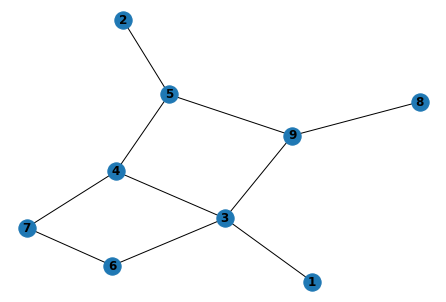

In [17]:
nx.draw( G, with_labels=True, font_weight='bold' )

The graph above is an **undirected graph** consisting of 9 **nodes** and 10 **undirected edges** connecting **neighbor** nodes together.  
The **degree** of a node is the number of connections. For example, the degree of Node 5 is 3 and the degree of Node 8 is 1.  
The degree of the graph is the maximal degree of nodes in the graph. Here Node 3 has 4 connections, so the degree of the graph is 4.

In [23]:
nx.all_pairs_node_connectivity( G )

{1: {2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1},
 2: {1: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1},
 3: {1: 1, 2: 1, 4: 3, 5: 2, 6: 2, 7: 2, 8: 1, 9: 2},
 4: {1: 1, 2: 1, 3: 3, 5: 2, 6: 2, 7: 2, 8: 1, 9: 2},
 5: {1: 1, 2: 1, 3: 2, 4: 2, 6: 2, 7: 2, 8: 1, 9: 2},
 6: {1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 7: 2, 8: 1, 9: 2},
 7: {1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 2, 8: 1, 9: 2},
 8: {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 9: 1},
 9: {1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 1}}

In [28]:
#return to node with the highest degree
max( list( G.degree ), key=lambda x: x[1] )

(3, 4)

In [51]:
list( nx.find_cliques( G ) )

[[2, 5],
 [3, 1],
 [3, 4],
 [3, 6],
 [3, 9],
 [5, 9],
 [5, 4],
 [7, 4],
 [7, 6],
 [8, 9]]

In [62]:
print( nx.has_path( G, 1, 4 ) )
print( nx.has_path( G, 1, 2 ) )

True
True


#### A Directed Graph

In [35]:
G2 = nx.DiGraph()
node_list = [ 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I' ]
G2.add_nodes_from( node_list )
G2.add_weighted_edges_from( [ ('A','C',1), ( 'B','E',1 ), ( 'C','F',1 ), ( 'C','D',1 ), ( 'D','G',1 ), \
                             ( 'D','E',1 ), ( 'C','I',1 ), ( 'E', 'I',1 ), ( 'F','G',1 ), ( 'H','I',1 ) ] )

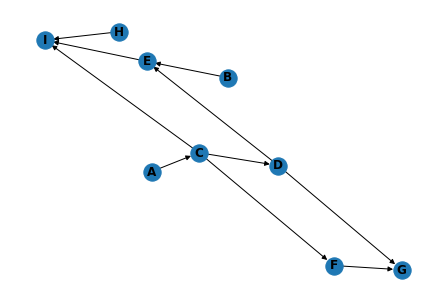

In [36]:
nx.draw( G2, with_labels=True, font_weight='bold' )

In [44]:
#analyze the connectivity of directed nodes
print( list( G2.successors( 'C' ) ) )
print( list( G2.predecessors( 'C' ) ) )

['F', 'D', 'I']
['A']


In [60]:
print( nx.has_path( G2, 'A', 'D' ) )
print( nx.has_path( G2, 'A', 'B' ) )

True
False


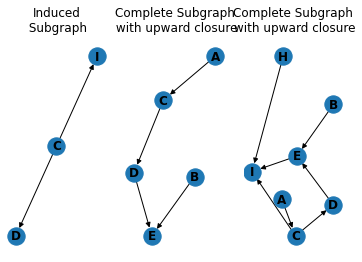

In [74]:
#subgraphs
import matplotlib.pyplot as plt
subgraph2_4A = G2.subgraph( ['D','C','I'] )
plt.subplot( 1,3,1 )
nx.draw( subgraph2_4A, with_labels=True, font_weight='bold' )
plt.title( 'Induced\n Subgraph' )
subgraph2_4B = G2.subgraph( ['A','D','C','B','E'] )
plt.subplot( 1,3,2 )
nx.draw( subgraph2_4B, with_labels=True, font_weight='bold' )
plt.title( 'Complete Subgraph\n with upward closure' )
subgraph2_4C = G2.subgraph( ['A','D','C','B','I', 'E', 'H'] )
plt.subplot( 1,3,3 )
nx.draw( subgraph2_4C, with_labels=True, font_weight='bold' )
plt.title( 'Complete Subgraph\n with upward closure' );

#### A polytree

In [75]:
G3 = nx.DiGraph()
node_list = [ 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L' ]
G3.add_nodes_from( node_list )
G3.add_weighted_edges_from( [ ('A','C',1), ( 'B','C',1 ), ( 'C','E',1 ), ( 'D','E',1 ), ( 'E','F',1 ), \
                             ( 'G','E',1 ), ( 'G','J',1 ), ( 'H', 'I',1 ), ( 'I','J',1 ), ( 'J','K',1 ), ( 'J', 'L',1 ) ] )

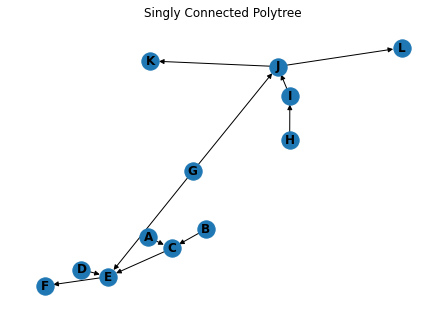

In [82]:
nx.draw( G3, with_labels=True, font_weight='bold' )
plt.title( 'Singly Connected Polytree');

#### a graph with a loop

In [84]:
G4 = nx.DiGraph()
node_list = [ 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L' ]
G4.add_nodes_from( node_list )
G4.add_weighted_edges_from( [ ('A','C',1), ( 'B','C',1 ), ( 'C','E',1 ), ( 'D','E',1 ), ( 'E','F',1 ), \
                             ( 'G','E',1 ), ( 'G','J',1 ), ( 'H', 'I',1 ), ( 'I','J',1 ), ( 'J','K',1 ), \
                             ( 'J', 'L',1 ), ('F','K',1 ) ] )

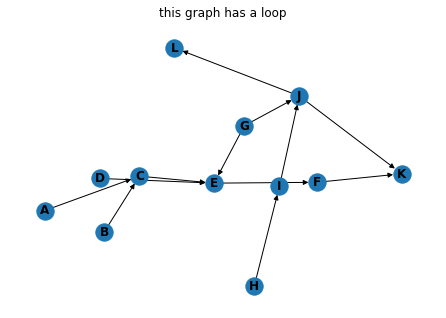

In [86]:
nx.draw( G4, with_labels=True, font_weight='bold' )
plt.title( 'this graph has a loop');

In [91]:
list( nx.cycle_basis( G4.to_undirected() ) )

[['E', 'G', 'J', 'K', 'F']]